In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import mglearn
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# create dummy data
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
# モデルの評価
print("test set score:{:.2f}".format(logreg.score(X_test, y_test)))

test set score:0.88


# 交差検証
```
メリット：
モデルの汎化性のがtrain_test_splir関数より高くなる。
理由：
train_test_splir関数はランダムに分割するがたまたま偏ってしまう可能性がある。

5分割したデータを4:1に分け4を訓練データ、1をテストデータとし、
全ての組み合わせ訓練する。
汎化性能が高くなければ評価精度は高くならないのだ

デメリット：
計算コスト
```

In [3]:
iris = load_iris()
logreg = LogisticRegression()
# 交差検証：データ分割を複数回行い、複数のモデルを訓練する手法
scores = cross_val_score(logreg, iris.data, iris.target)
print("交差検証　3分割 score{}".format(scores))

交差検証　3分割 score[ 0.96078431  0.92156863  0.95833333]


```
気づき
train_test_split関数で分割したデータを学習させた時よりも
モデルの予測精度が高くなっていることがわかる。
```

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("交差検証　5分割{}".format(scores))

交差検証　5分割[ 1.          0.96666667  0.93333333  0.9         1.        ]


In [5]:
print("average score {:.2f}".format(scores.mean()))

average score 0.96


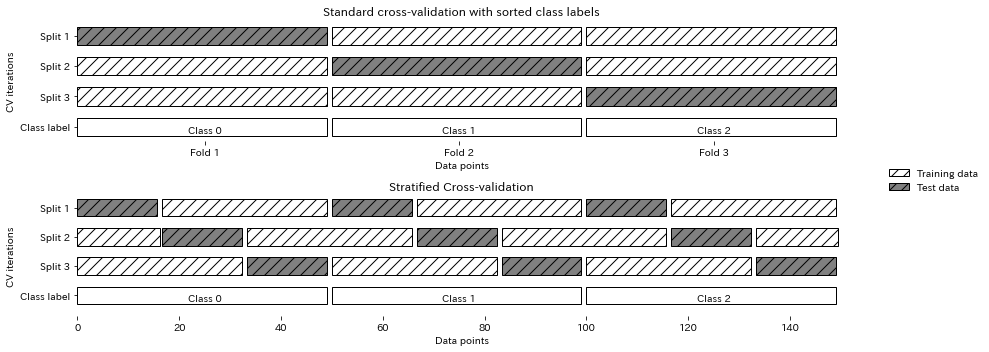

In [6]:
mglearn.plots.plot_stratified_cross_validation()

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [234]:
# 学習できなかった
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.  0.  0.]


In [251]:
iris = load_iris()
print(len(iris.target))
print(iris.target[0:50])
print(iris.target[50:100])
print(iris.target[100:150])

150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [256]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("交差検証　3分割 score{}".format(scores))

交差検証　3分割 score[ 0.96078431  0.92156863  0.95833333]


```
#　気づき
k-分割交差検証を3分割でやれは、評価精度は0になるはずではないのか？
ならないということは上記のソースはk-分割交差検証ではないようだ。
自動的に層化分割交差検証p249で実行されている？
3分割した中でさらに、3分割し、訓練データとテストデータに分け評価をしているのではないか？
いや、しかしその場合100%になってしまうのではないのか？
違う。層化交差検証ではここの分割の90%がクラスAで10％がクラスBになるように分割を行う。
その理由であれば納得できぐら、回帰に関してはK分割交差検証をデフォルで利用していると記載あり。(P251)
と思ったがどうやらモデルに依存している！！！！
ロジッスティック回帰　= 分類だったからうまくいったようだ
上の学習できなかった方法は関数KFold()で意図的にK分割交差検証を実施していた。


#　デフォルト動作：
回帰：K分割交差検証
分類：層化K分割交差検証
```

In [235]:
# 学習できなかった
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [233]:
# シャッフルする
kfold = KFold(n_splits=3,shuffle=True, random_state=0)
print("Cross-validation scores:\n{}"
      .format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[ 0.9   0.96  0.96]


In [10]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations：", len(scores))
print("Mean accuracy:{:.2f}".format(scores.mean()))

Number of cv iterations： 150
Mean accuracy:0.95


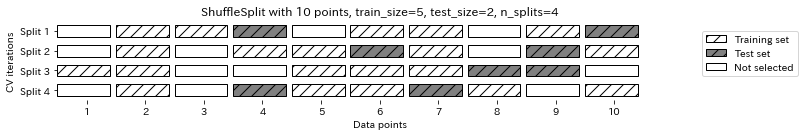

In [11]:
mglearn.plots.plot_shuffle_split()

In [12]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
print(shuffle_split)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

ShuffleSplit(n_splits=10, random_state=None, test_size=0.5, train_size=0.5)
Cross-validation scores:
[ 1.          0.97333333  0.98666667  0.96        0.98666667  0.89333333
  1.          0.96        0.92        0.92      ]


In [13]:
from sklearn.model_selection import GroupKFold
#合成データセットを生成
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[ 0.75        0.8         0.66666667]


```
メモ
グループ付き考査検証：
訓練データとテストデータでデータが重ならないようにする方法
重ならないようにグループに分けておく
```

In [14]:
mglearn.plots.plot_label_kfold()

AttributeError: 'module' object has no attribute 'plot_label_kfold'

# グリッドサーチ
```
用途：最適なパラメータの探索
パラメータ全ての組み合わせに対して試す方法

処理内容：
分割した　訓練データとテストデータの
訓練データを交差検証で訓練データ_2とテストデータ_2に分割し
分割した訓練データ_2からモデルを構築する。テストデータ_2で評価精度が最も高くなる
パラメータを選択する。

メリット：
パラメータの探索にテストデータを使っていないこと、交差検証のみ活用した場合の問題はモデルの
構築でテストデータを活用していることだった。モデルの構築に活用したデータは評価には使えない。
グリッドサーチは訓練データから、パレメータを探索しているため、テストデータで評価することができる。
```

In [ ]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set:{}　size of test set:{}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        #それぞれのパラメータの組み合わせに足してSVCを訓練
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        #SVCをテストセットで評価
        score = svm.score(X_test, y_test)
        #良いスコアであればスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

In [ ]:
38 / (112 + 38)

In [ ]:
mglearn.plots.plot_threefold_split()

In [228]:
from sklearn.svm import SVC
# データを訓練 + 検証セットとテストセットに分割する
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
#訓練+検証セットを訓練セットと検証セットに分割する
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,y_trainval,random_state=1)
print("size of train set :{}\nsize of validation set:{}\nsize of test set:"
       "{}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # それぞれのパラメータの組み合わせに対してSVCを訓練する
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVCを検証セットで評価
        score = svm.score(X_valid, y_valid)
        # 良いスコアだったらスコアとパラメータを保持
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
# 訓練セットと検証セットを用いてモデルを再構築し、
#　テストセットで評価
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set:{:.2f}".format(best_score))
print("Best parameters:",best_parameters)
print("Test set score with best parameters:{:.2f}".format(test_score))

size of train set :84
size of validation set:28
size of test set:38

Best score on validation set:0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters:0.92


# 交差検証を用いたグリッドサーチ

In [229]:
for gmma in [0.001,0.01, 0.1, 1, 10, 100]:
    for C in [0.001,0.01,0.1,1,10,100]:
        # それぞれのパラメータの組み合わせに対して
        # SVCを訓練する
        svm = SVC(gamma=gamma, C=C)
        # 交差検証を行う
        scores = cross_val_score(svm, X_trainval,y_trainval,cv=5)
        # 交差検証の平均値を計算
        score = np.mean(scores)
        # 良いスコアであれbスコアとパラメータを記録
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
# 訓練セットと検証セットを合わせてモデルを再構築する
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn

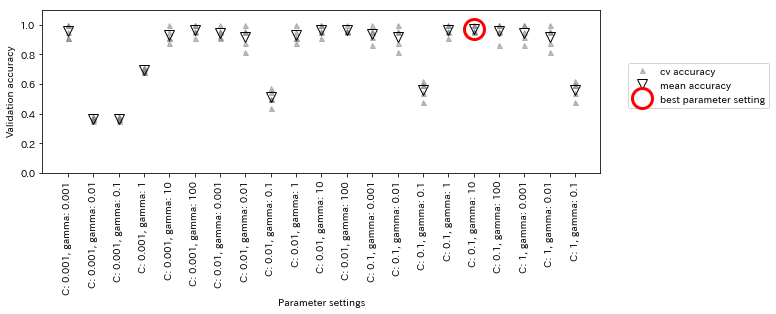

In [15]:
mglearn.plots.plot_cross_val_selection()

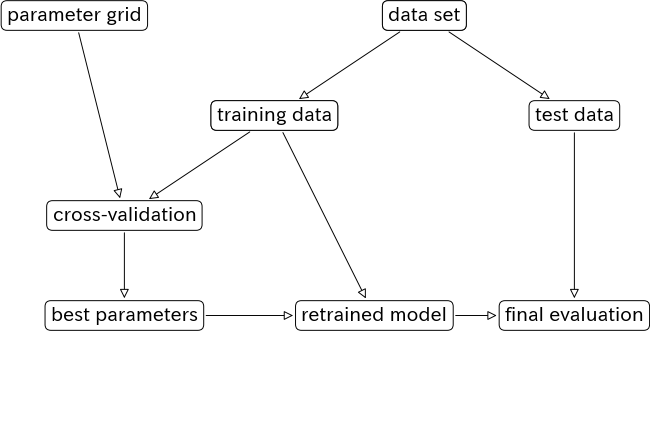

In [16]:
mglearn.plots.plot_grid_search_overview()

# GridSearchCV Class
```
sckit-learnで提供されるGridSearchCVクラスを活用してハイパーパラメータを求める
```

In [66]:
# ライブラリ
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# パラメータ
param_grid = {'C':[0.001, 0.01, 0.1, 1,10, 100],
              'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

# GridSearch インスタンス生成
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# パラメータの過剰適合を防ぐためにさらに訓練セットとテストセットを分割
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 交差検証を実行
grid_search.fit(X_train, y_train)
print("test set score:{:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best cross-validation score :{:.2f}".format(grid_search.best_score_))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
test set score:0.97
Best parameters:{'C': 100, 'gamma': 0.01}
Best cross-validation score :0.97


```
この方法だとパラメータの過剰適合が起こってしまうのでは？
交差検証でハイパーパラメータ探索時に、テストデータを使っている場合
新しいデータに対して97%の精度を出せるとは言えない
→　評価にテストセットを活用していない。つまり本当に精度の高いハイパーパラメータは
Best parameters:{'C': 100, 'gamma': 0.01}ということだ。
しかし、算出された精度97%は訓練セットに対しての精度だということに注意しなければならない。
```

In [67]:
svm = SVC(**grid_search.best_params_)
train_scores = cross_val_score(svm, X_train, y_train, cv= 5)
print("train set score {:.2f}".format(np.mean(train_scores)))
test_scores = cross_val_score(svm, X_test, y_test, cv= 5)
print("test set score {:.2f}".format(np.mean(test_scores)))

train set score 0.97
test set score 0.91


```
気づき
テストデータに対しては91%の精度である。
パラメータ'C': 10, 'gamma': 0.001を利用した時は
92%であった。
パラメータ'C': 100, 'gamma': 0.01よりも'C': 10, 'gamma': 0.001
の方が精度が高いのではないか？
→　random_stateの値で精度が変わる。
試しに、C=10, gamma=0.001で検証してみる
```

In [68]:
svm = SVC(C=10, gamma=0.001)
train_scores = cross_val_score(svm, X_train, y_train, cv= 5)
print("train set score {:.2f}".format(np.mean(train_scores)))
test_scores = cross_val_score(svm, X_test, y_test, cv= 5)
print("test set score {:.2f}".format(np.mean(test_scores)))

train set score 0.93
test set score 0.77


```
気づき
検証の結果やはり、C': 100, 'gamma': 0.01の方が
モデルとして精度が高いようだ。
```

In [69]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# 交差検証の結果の解析

In [70]:
import pandas as pd
# グリッドサーチの結果：grid_search.cv_results_
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.001281,0.000699,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.001038,0.000439,0.011371,0.002852
1,0.000638,0.000272,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000060,0.000030,0.011371,0.002852
2,0.000665,0.000283,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000094,0.000061,0.011371,0.002852
3,0.000710,0.000332,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000088,0.000068,0.011371,0.002852
4,0.000615,0.000287,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,0.000042,0.000054,0.011371,0.002852


In [63]:
scores = np.array(results.mean_test_score)
scores 

array([ 0.36607143,  0.36607143,  0.36607143,  0.36607143,  0.36607143,
        0.36607143,  0.36607143,  0.36607143,  0.36607143,  0.36607143,
        0.36607143,  0.36607143,  0.36607143,  0.69642857,  0.91964286,
        0.95535714,  0.36607143,  0.36607143,  0.92857143,  0.96428571,
        0.96428571,  0.9375    ,  0.91964286,  0.5625    ,  0.96428571,
        0.97321429,  0.95535714,  0.94642857,  0.91964286,  0.5625    ])

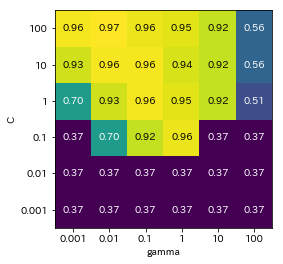

In [72]:
scores = np.array(results.mean_test_score).reshape(6,6)
# 平均交差検証のスコアのプロット
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                     ylabel ='C', yticklabels=param_grid['C'], cmap='viridis')

ValueError: gamma < 0

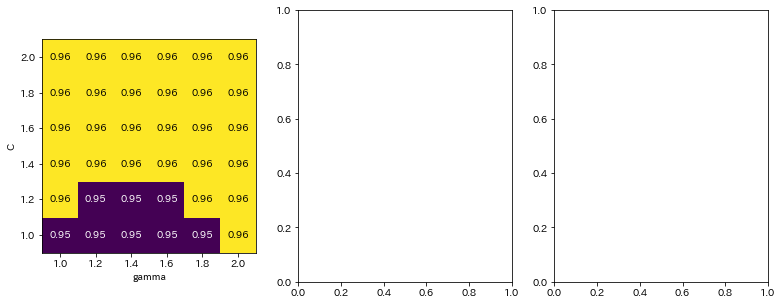

In [232]:
"""
テキストに従いエラーの出るソース
"""

fig , axes = plt.subplots(1, 3, figsize=(13,5))
param_grid_linear = {'C':np.linspace(1,2,6),
                    'gamma':np.linspace(1,2,6)}
param_grid_one_log = {'C':np.linspace(1,2,6),
                     'gamma':np.linspace(-3,2,6)}
param_grid_range = {'C':np.linspace(-3,2,6),
                     'gamma':np.linspace(-7,-2,6)}
for param_grid, ax in zip([param_grid_linear,param_grid_one_log,param_grid_range],axes):
    #print(param_grid)
    #print(ax)
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    #　平均交差検証精度をプロット
    scores_image = mglearn.tools.heatmap(
        scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())
    

```
gammaが-だとエラーになる
```

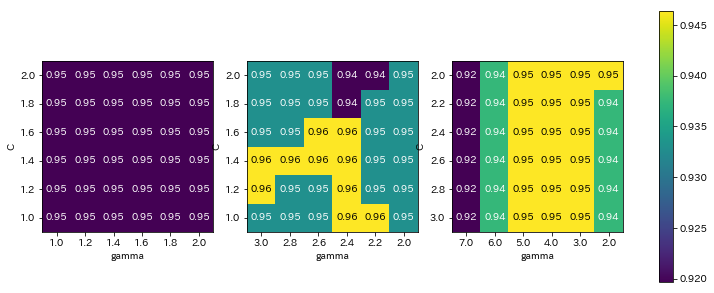

In [74]:
fig , axes = plt.subplots(1, 3, figsize=(13,5))
param_grid_linear = {'C':np.linspace(1,2,6),
                    'gamma':np.linspace(1,2,6)}
param_grid_one_log = {'C':np.linspace(1,2,6),
                     'gamma':np.linspace(3,2,6)}
param_grid_range = {'C':np.linspace(3,2,6),
                     'gamma':np.linspace(7,2,6)}
for param_grid, ax in zip([param_grid_linear,param_grid_one_log,param_grid_range],axes):
    #print(param_grid)
    #print(ax)
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    #　平均交差検証精度をプロット
    scores_image = mglearn.tools.heatmap(
        scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

# グリッドでないサーチ空間

In [202]:
param_grid = [{'kernel':['rbf'],
              'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100]},
             {'kernel':['linear'],
             'C':[0.001,0.01,0.1,1,10,100]}]
print("list of grids:\n{}".format(param_grid))

list of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [207]:
# パラメータの過剰適合を防ぐためにさらに訓練セットとテストセットを分割
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
grid_search = GridSearchCV(SVC(),param_grid, cv=5)
grid_search.fit(X_train,y_train)
print("best parameters：{}".format(grid_search.best_params_))
print("vest cross validation score:{:}".format(grid_search.best_score_))


best parameters：{'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
vest cross validation score:0.9732142857142857


In [214]:
# ハイパーパラメータでモデルを構築・評価
clf = SVC(**grid_search.best_params_)
clf.fit(X_train,y_train)
print("best parameters test score:{:}".format(clf.score(X_test,y_test)))

best parameters test score:0.9736842105263158


In [53]:
rsults = pd.DataFrame(grid_search.cv_results_)
display(results.T)

/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/keisuke/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean_fit_time,0.000836372,0.000738001,0.000764799,0.000678205,0.000689554,0.000655413,0.000692368,0.000584221,0.000605631,0.00068078,...,0.000575161,0.000487947,0.000906992,0.000809717,0.000422812,0.000354242,0.000354147,0.000474787,0.000783491,0.000922012
mean_score_time,0.000341034,0.000324202,0.000331402,0.000263977,0.000353813,0.00026803,0.0003016,0.000256205,0.000304127,0.000287056,...,0.000338173,0.000253868,0.000335598,0.000287008,0.000240993,0.000207233,0.000204992,0.000217152,0.000235176,0.000299597
mean_test_score,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,0.366071,...,0.964286,0.9375,0.919643,0.5625,0.964286,0.973214,0.955357,0.946429,0.919643,0.5625
mean_train_score,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,0.366079,...,0.986566,0.986591,1,1,0.977676,0.984368,0.988788,1,1,1
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}",...,"{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
rank_test_score,16,16,16,16,16,16,16,16,16,16,...,2,8,10,14,2,1,5,7,10,14
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,1,1,0.958333,0.916667,0.875,0.541667
split0_train_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,0.988636,0.988636,1,1,0.977273,0.988636,0.988636,1,1,1


# ネストした交差検証
```
＃　交差検証課題：
今まで実施した交差検証ではテストを１度だけ分割している。
train_test_split関数で分割した訓練データを活用し、交差検証を実施している。
この方法の問題は最初の一度だけの分割に結果が依存してしまい不安定になる可能性がある。
そこで1度だけでなく交差検証で何度も分割することを考える。
この手法をネストした交差検証と呼ぶ

#　用途：
あるモデルのあるデータセットに対する性能の評価
```

In [215]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Cross-validation scores：",scores)
print("Mean cross-validation core", scores.mean())

Cross-validation scores： [ 0.96666667  1.          0.9         0.96666667  1.        ]
Mean cross-validation core 0.966666666667


```
ネスとした交差検証をscikit-learnで実行すりにはcross_val_ScoreをGridSearchCVのインスタンスをモデルとして呼び出せばいい
```

# ネストした交差検証
```
内部処理をわかりやすく実装する。下記を理解した上で活用することが重要だと思う。

#　処理フロー

1.外側ループ：交差検証回数分、交差検証で訓練データとテストデータに分割
2.グリッドサーチ[ループ]：ハイパーパラメータの組み合わせ分
3.内側ループ：交差検証回数分、外側ループで分割した訓練データを訓練データとテストデータに分割する
分割したテストデータをハイパーパラメータ[g,m]の探索で活用する
4.探索したハイパーパラメータと外側ループの訓練データでモデルを構築
5.外側ループで分割し、まだ活用していないテストデータで評価する。
6.評価精度をリストに追加する。
```

In [217]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    outer_params = []
    """
    外側ループ：データセットを訓練セット/テストセットに分割
    """
    #・交差検証：
    # 1回目　5分割[訓練：4：テスト：1] training_samples　120 , test_samples 30
    # 2回目　5分割[訓練：4：テスト：1] training_samples　120 , test_samples 30
    # 3回目　5分割[訓練：4：テスト：1] training_samples　120 , test_samples 30
    # 4回目　5分割[訓練：4：テスト：1] training_samples　120 , test_samples 30
    # 5回目　5分割[訓練：4：テスト：1] training_samples　120 , test_samples 30
    for training_samples, test_samples in outer_cv.split(X,y):
        #　print("length train {}".format(len(training_samples)))
        #　print("train"+ str(training_samples))
        #　print("length test {}".format(len(test_samples)))
        #　print("test"+ str(test_samples))
        best_parms = {}
        best_score = -np.inf
        """
        グリッドサーチの実行
        """
        for parameters in parameter_grid:
            cv_scores = []
            """
            内側ループ：外側のループで交差検証により分割された訓練データを交差検証で分割
            """
            # 1回目　5分割[訓練：4：テスト：1] training_samples 96　 , test_samples 24
            for inner_train, inner_test in inner_cv.split(X[training_samples],y[training_samples]):
                #print("length train {}".format(len(inner_train)))
                #print("length test {}".format(len(inner_test)))
                #　モデル構築・学習・評価
                clf = Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                score = clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(cv_scores)
            #　評価精度の高いパラメータを保持
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        """
        モデル構築
        """
        # ハイパーパラメータ：最初に分割した訓練データを分解したテストデータの評価が高いパラメータ]
        clf = Classifier(**best_params)
        #　学習：訓練データ
        clf.fit(X[training_samples], y[training_samples])
        # 評価：パラメータの選択で活用していないテストデータ[未知]
        outer_scores.append(clf.score(X[test_samples],y[test_samples]))
        outer_params.append(best_params)
    return np.array([outer_scores,outer_params ])

In [231]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold


scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                  StratifiedKFold(5),SVC, ParameterGrid(param_grid))
print("Cross-validation scores:{}".format(scores))
print(len(scores[0]))
print("Cross-validation mean scores:{}".format(scores[0].mean()))

Cross-validation scores:[[0.96666666666666667 1.0 0.96666666666666667 0.96666666666666667 1.0]
 [{'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
  {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
  {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
  {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
  {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}]]
5
Cross-validation mean scores:0.9800000000000001


```
気づき：
ハイパーパラメータの値はtrain_test_splitで実行したものと一致した。
'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
しかし、モデルの評価精度は下がった。
こちらの方が不安定でない数値だと言える。
あと、交差検証で1が出る理由がよくわからないなあ。
shuffle関数を使えば学習できないことはないけど、1はまだ出る。
評価精度100%がどうして出てくるのか？
分割したテストデータを活用してるから未知のはず
```

In [230]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold


scores = nested_cv(iris.data, iris.target, StratifiedKFold(n_splits=5,shuffle=True),
                  StratifiedKFold(n_splits=5,shuffle=True),SVC, ParameterGrid(param_grid))
print("Cross-validation scores:{}".format(scores))
print(len(scores[0]))
print("Cross-validation mean scores:{}".format(scores[0].mean()))

Cross-validation scores:[[1.0 0.90000000000000002 0.96666666666666667 0.93333333333333335
  0.96666666666666667]
 [{'kernel': 'rbf', 'C': 10, 'gamma': 1}
  {'kernel': 'rbf', 'C': 100, 'gamma': 1}
  {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
  {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
  {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}]]
5
Cross-validation mean scores:0.9533333333333334


# 偏ったデータセット

In [266]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9
print(y)
print(len(y))

X_train,X_test, y_train, y_test = train_test_split(digits.data,y,random_state=0)

[False False False ..., False  True False]
1797


In [264]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("unique predicted labels{}".format(np.unique(pred_most_frequent)))
print("test score：{:.2f}".format(dummy_majority.score(X_test,y_test)))

unique predicted labels[False]
test score：0.90
